Aluno: Pedro Siade Ferreira

Matricula : 202004734

In [12]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import sys
import math
import time

In [13]:
def filtroTamanhoArbitrario(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [14]:
def modularizacaoMatriz(img1,img2):
    M, N = img.shape
    h = np.zeros((M,N), dtype = np.float32)
    for v in range(0, N ):
        for u in range(0, M):
            h[u,v]=np.round(math.sqrt(img1[u,v]**2+img2[u,v]**2))
    return h

In [15]:
def fatiamentoNiveisIntensidadeA(imagem):
  l,c= imagem.shape
  for x in range(l):
    for y in range(c):
      if imagem[x][y]>150:
        imagem[x,y]=255
      else:
        imagem[x,y]=0
  return imagem

In [16]:

def montarFiltroGaussiano(m,n, sigma):
  h = np.zeros((m,n), dtype = np.float32)
  a = (m-1)/2
  b = (n-1)/2
  for x in range(m):
        for y in range(n):
              h[x,y] =np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))
  h = h/np.sum(h)
  return h

In [17]:
sobel= np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
sobel2= np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
prewittx = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ])
prewitty = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
    ])

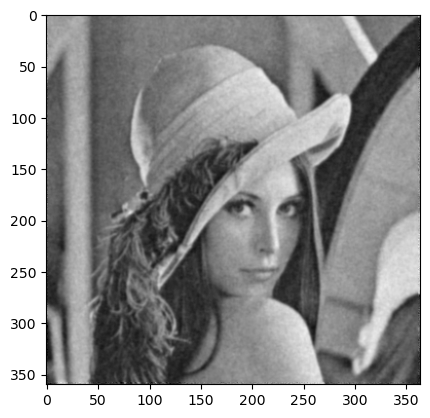

In [18]:
img = cv2.imread('imagens/Captura de tela 2023-08-03 171700.png', cv2.IMREAD_GRAYSCALE)
g33=montarFiltroGaussiano(5,5, 1)
img_gaussiana=filtroTamanhoArbitrario(img, g33)
plt.imshow(img_gaussiana, cmap='gray')


Prewitt:

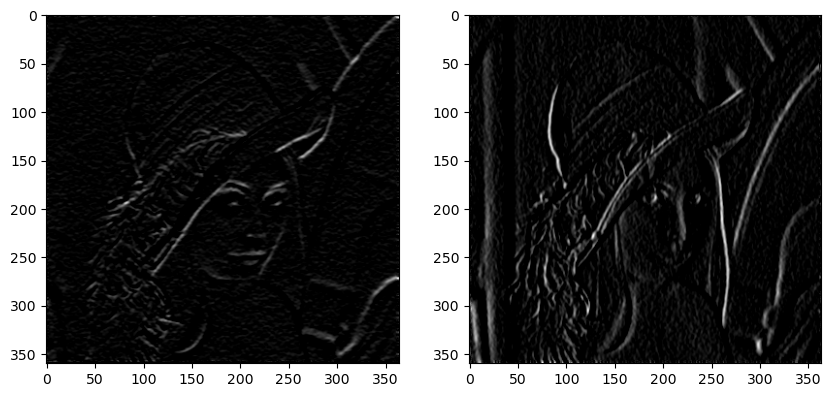

In [19]:
imgPrewittx = cv2.filter2D(img_gaussiana, -1, prewittx)
imgPrewitty = cv2.filter2D(img_gaussiana, -1, prewitty)
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(imgPrewittx,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(imgPrewitty,cmap = 'gray')

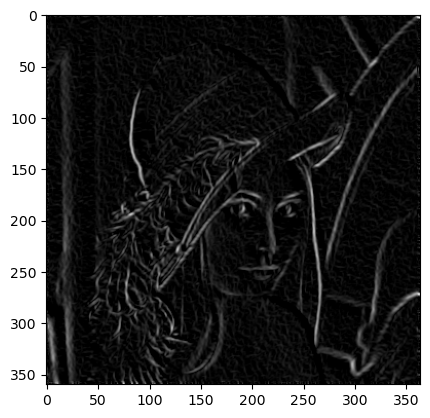

In [20]:
img2=modularizacaoMatriz(imgPrewittx, imgPrewitty)
plt.imshow(img2, cmap='gray')



Sobel:


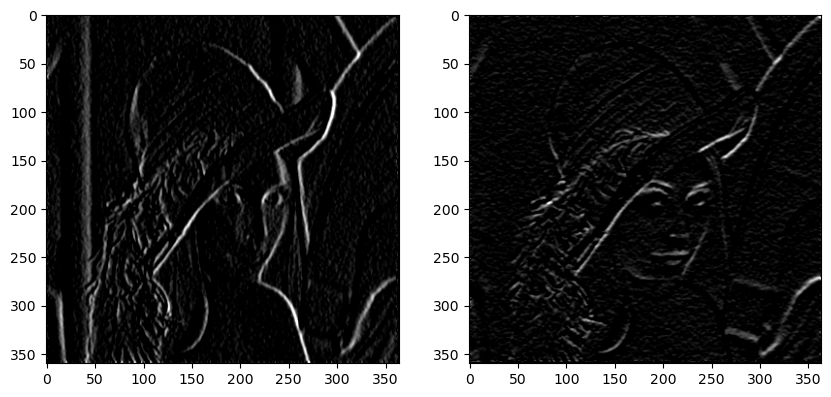

In [21]:
sobelx = cv2.filter2D(img_gaussiana, -1, sobel)
sobely = cv2.filter2D(img_gaussiana, -1, sobel2)
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobelx,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(sobely,cmap = 'gray')


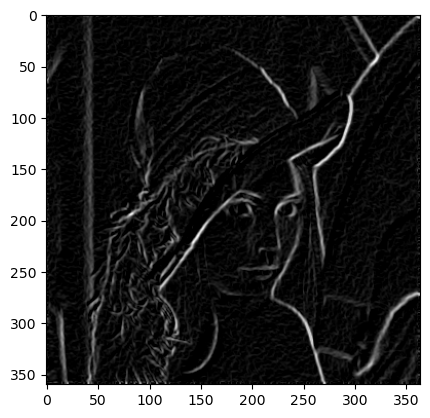

In [22]:
img3=modularizacaoMatriz(sobelx, sobely)
plt.imshow(img3, cmap='gray')


Foi utilizado a open cv porque foi tentado fazer direto, sem o uso da mesma, sendo foi encontrado muitas dificuldades. Uma vez que o código do filtro de tamanho arbitrário multiplica a soma dos coeficientes, oque acaba sendo multiplicado por 0, pois a soma dos mesmos para filtro de derivadas é 0.
Sendo assim

Os filtros de Sobel constituem uma evolução em relação aos filtros de Prewitt, devido à sua capacidade de realçar os elementos na vizinhança imediata ao pivô. Essa melhoria é alcançada ao atribuir um peso de 2 a essa região específica. Como resultado, o filtro de Sobel tem a capacidade de reduzir ainda mais os ruídos presentes na imagem, proporcionando uma observação aprimorada. Além disso, as bordas tornam-se mais nítidas, contribuindo para uma análise mais precisa.

É evidente a presença de um nível significativamente maior de ruído na imagem ao aplicar o filtro Prewitt, especialmente quando examinamos a área correspondente ao rosto de Lena. Além dessa observação, ao analisarmos as bordas após a aplicação do filtro Sobel, percebemos um notável aumento na nitidez. Essa diferença é particularmente notável ao investigarmos a porção esquerda das imagens. No caso do filtro Prewitt, as bordas carecem de uma nitidez pronunciada, não exibindo uniformidade e assemelhando-se a traços feitos com giz. Em contraste, o segundo método resulta em bordas consideravelmente mais nítidas, semelhantes a traços feitos com lápis, apresentando uma linearidade que facilita significativamente a análise visual.

Portanto, pode-se concluir que o filtro de sobel é uma evolução do filtro de prewitt, obtendo resultados melhores.